In [1]:
import os
import pandas as pd
pd.set_option('max_rows',None)
import json
import numpy as np
from datetime import *
import time as t

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv',delimiter=';')

In [3]:
data.shape

(790, 5)

In [4]:
data['Date'] = data['Date'].apply(lambda x : datetime.strptime(x, "%m-%d-%Y"))
data.rename(columns = {'Date':'date'},inplace = True)

In [5]:
data.describe(include = 'all')

,date,installs,spend_facebook,spend_google,promotion
count,790,790.000000,247.000000,162.000000,158
unique,790,NaN,NaN,NaN,1
top,2020-08-26 00:00:00,NaN,NaN,NaN,Yes
freq,1,NaN,NaN,NaN,158
first,2019-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2021-02-28 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,1252.686076,774.991903,1142.635802,NaN
std,NaN,885.162724,297.661222,643.568176,NaN
min,NaN,300.000000,200.000000,203.000000,NaN
25%,NaN,439.250000,563.000000,396.250000,NaN


In [6]:
data.head()

,date,installs,spend_facebook,spend_google,promotion
0,2019-01-01,1667,1406.0,NaN,Yes
1,2019-01-02,1889,1197.0,NaN,Yes
2,2019-01-03,1462,1090.0,NaN,Yes
3,2019-01-04,1218,1434.0,NaN,Yes
4,2019-01-05,1721,1449.0,NaN,Yes


In [7]:
# Data ranges between 1st Jan 2019 to 28th Feb 2021 i.e. 26 months 
# Average install per day is 1252.69 with Standard deviation of 885.16

# Facebook Spends
# You have spent on 247 days in 26 months i.e 9.5 days per month
# Average spends per day is 1252.69$ with Standard deviation of 885.16$
# with highest spend of 1475$ and lowest of 200$

# Google Spends
# You have spent on 162 days in 26 months i.e 6.23 days per month
# Average spends per day is 775$ with Standard deviation of 297.66$
# with highest spend of 2195$ and lowest of 203$

In [8]:
# Adding Features for analysis
data.loc[data['promotion'].isna(),'promotion'] = 'No'

data['month'] = data.date.dt.month
data['week'] = data.date.dt.weekofyear
data['year'] = data.date.dt.year
data['weekday'] = data.date.dt.weekday


data['flag'] = 'No Campaign'

data.loc[~(data['spend_facebook'].isna()) &
         (data['spend_google'].isna()) &
         (data['promotion'] == 'No'),'flag'] = 'Only FB'

data.loc[(data['spend_facebook'].isna()) &
         ~(data['spend_google'].isna()) &
         (data['promotion'] == 'No'),'flag'] = 'Only Google'

data.loc[~(data['spend_facebook'].isna()) &
         (data['spend_google'].isna()) &
         (data['promotion'] == 'Yes'),'flag'] = 'FB with promotion'

data.loc[(data['spend_facebook'].isna()) &
         ~(data['spend_google'].isna()) &
         (data['promotion'] == 'Yes'),'flag'] = 'Google with promotion'

data.loc[~(data['spend_facebook'].isna()) &
         ~(data['spend_google'].isna()) &
         (data['promotion'] == 'No'),'flag'] = 'Google & FB'

data.loc[~(data['spend_facebook'].isna()) &
         ~(data['spend_google'].isna()) &
         (data['promotion'] == 'Yes'),'flag'] = 'All'


installs                      spend_facebook  \
                              count     sum         mean          count   
Facebook Google Discounted                                                
False    False  False           435  340950   783.793103              0   
         True   False            68   56716   834.058824              0   
                True             40   69968  1749.200000              0   
True     False  False           128  228744  1787.062500            128   
                True             65  115137  1771.338462             65   
         True   False             1    1972  1972.000000              1   
                True             53  176135  3323.301887             53   

                                                spend_google           \
                                sum        mean        count      sum   
Facebook Google Discounted                                              
False    False  False           0.0         NaN            0      0.0   
         True   False           0.0         NaN           68  41732.0   
                True            0.0         NaN           40  42520.0   
True     False  False       92061.0  719.226562            0      0.0   
                True        60620.0  932.615385            0      0.0   
         True   False         433.0  433.000000            1   2186.0   
                True        38309.0  722.811321           53  98669.0   

                                        promotion  
                                   mean     count  
Facebook Google Discounted                         
False    False  False               NaN       435  
         True   False        613.705882        68  
                True        1063.000000        40  
True     False  False               NaN       128  
                True                NaN        65  
         True   False       2186.000000         1  
                True        1861.679245        53

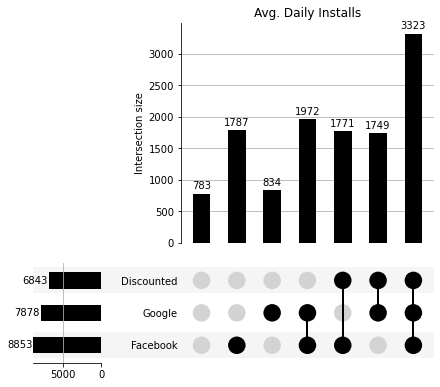

In [24]:
import upsetplot as usp

df = data.copy()

df['Facebook'] = np.where(df['spend_facebook'].isna(),False,True)
df['Google'] = np.where(df['spend_google'].isna(),False,True)
df['Discounted'] = np.where(df['promotion'] == 'Yes',True,False)

ctab = df.groupby(['Facebook','Google','Discounted'],as_index=True).agg({'installs':['count','sum','mean'],
                                                                  'spend_facebook':['count','sum','mean'],
                                                                  'spend_google':['count','sum','mean'],
                                                                  'promotion':['count']})

display(ctab)
# usp.plot(ctab[('installs', 'sum')], show_counts='%d',show_percentages = False,sort_by='degree',orientation='horizontal',element_size = 50)
# plt.title('Total Installs')
# plt.show()


# usp.plot(ctab[('installs', 'count')], show_counts='%d',show_percentages = False,sort_by='degree',orientation='horizontal',element_size = 50)
# plt.title('Total days')
# plt.show()

usp.plot(ctab[('installs', 'mean')], show_counts='%d',show_percentages = False,sort_by='degree',orientation='horizontal',element_size = 50)
plt.title('Avg. Daily Installs')
plt.show()

# usp.plot(ctab[('spend_facebook', 'sum')], show_counts='%d',show_percentages = False,sort_by='degree',orientation='horizontal',element_size = 50)
# plt.title('Total Facebook Spend')
# plt.show()

# usp.plot(ctab[('spend_facebook', 'mean')], show_counts='%d',show_percentages = False,sort_by='degree',orientation='horizontal',element_size = 50)
# plt.title('Avg. Daily Facebook Spend')
# plt.show()

# usp.plot(ctab[('spend_google', 'sum')], show_counts='%d',show_percentages = False,sort_by='degree',orientation='horizontal',element_size = 50)
# plt.title('Total Google Spend')
# plt.show()

# usp.plot(ctab[('spend_google', 'mean')], show_counts='%d',show_percentages = False,sort_by='degree',orientation='horizontal',element_size = 50)
# plt.title('Avg. Daily Google Spend')
# plt.show()


#### From above plot we can infer the following:

1. Marketing on Facebook gives better results when compared with google

2. Google with promotions have great results compared to just google campaigns.

3. Campaigning on all available channels at one gives the best results, compared to any other permutations.

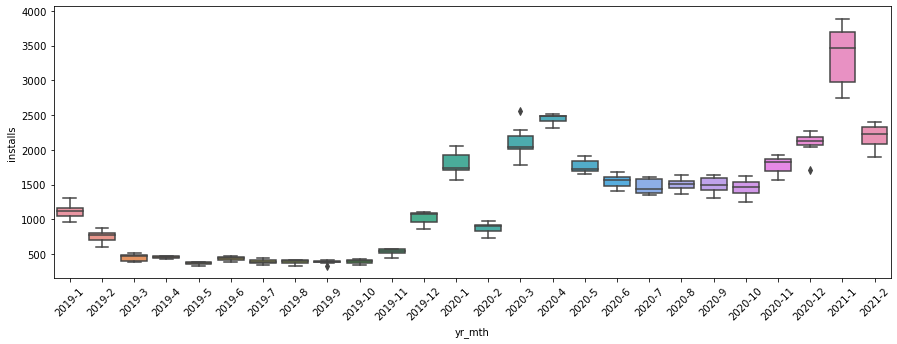

In [10]:
df = data.copy()
df = df.groupby(['year','month','weekday'],as_index=False)['installs'].mean()
df['yr_mth'] = df['year'].astype(str)+'-'+df['month'].astype(str)
plt.figure(figsize=(15,5))
sns.boxplot(df['yr_mth'],df['installs'])
plt.xticks(rotation = 45)
plt.show()

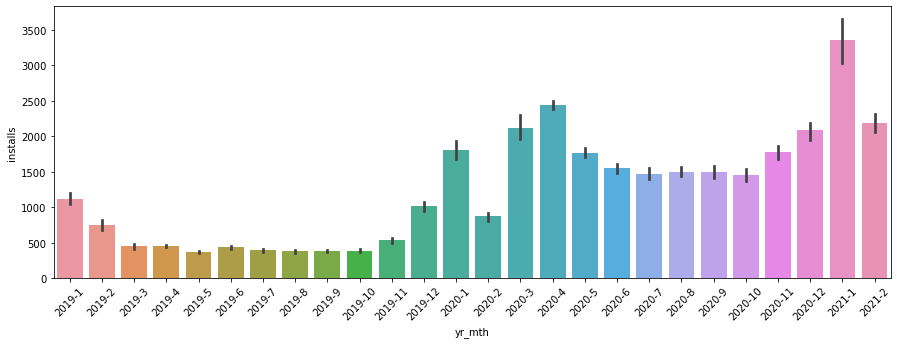

In [11]:
df = data.copy()
df = df.groupby(['year','month','weekday'],as_index=False)['installs'].mean()
df['yr_mth'] = df['year'].astype(str)+'-'+df['month'].astype(str)
plt.figure(figsize=(15,5))
sns.barplot(df['yr_mth'],df['installs'])
plt.xticks(rotation = 45)
plt.show()

#### Installations are higher towards the end & beggining of year


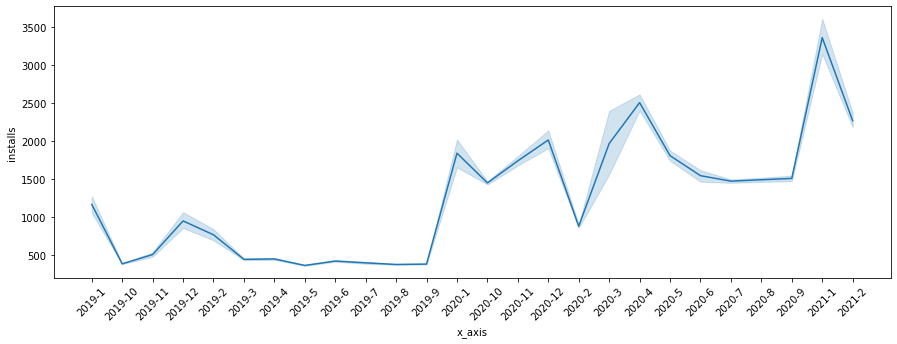

In [12]:
df = data[(data['spend_facebook'].isna()) & 
          (data['spend_google'].isna()) &
          (data['promotion'] != 'Yes')]
df=data.copy()

# df = df.groupby(['year','month'],as_index=False)['installs'].mean()
df['x_axis'] = df['year'].astype(str)+'-'+df['month'].astype(str)
plt.figure(figsize=(15,5))
# sns.barplot(df['yr_mth'],df['installs'],hue=df['weekend'],)
sns.lineplot(df['x_axis'],df['installs'].ewm(2).mean())
plt.xticks(rotation = 45)
plt.show()

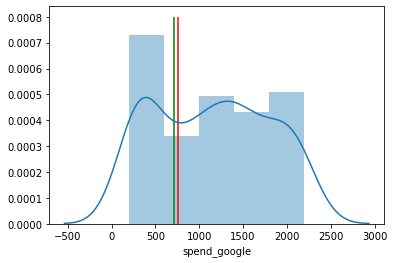

In [13]:
df = data[~data['spend_google'].isna()]
sns.distplot(df['spend_google'])
plt.vlines(df['spend_facebook'].mean(),0,0.0008,color = 'green',label = 'mean')

plt.vlines(df['spend_facebook'].median(),0,0.0008,color = 'red',label = 'median')

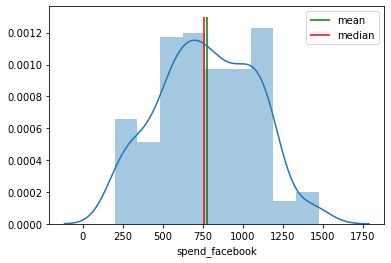

In [14]:
df = data[~data['spend_facebook'].isna()]

sns.distplot(df['spend_facebook'])
plt.vlines(df['spend_facebook'].mean(),0,0.0013,color = 'green',label = 'mean')

plt.vlines(df['spend_facebook'].median(),0,0.0013,color = 'red',label = 'median')
plt.legend()

<BarContainer object of 790 artists>

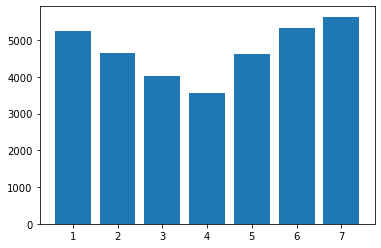

In [19]:
plt.bar(data['weekday']+1,data['installs'])

In order to find impact of marketing campaigns performed by Twigeo historically, we will perform following steps:

1. Pick data subest where campaigns were run on either Google or Facebook individually. Which means no data will be present where there are promotions run by client or days where campaigns were run on both google and facebook.

2. Plot a scatter having installs on X axis and spends on y axis to analyse the trends.

3. Fit a 2nd order polynomial to summarize the trend of data and store the coefficients for both Google and Facebook separately. These dataframes will have mapping of spend vs installations.

4. Use these coefficients to map back on main dataframe where campaigns were not run individually. For e.g. if a FB campaign was run with promotion, the installations would account for both promotion and FB campaign. So in order to remove the impact of promotions we first need to find how much ideal installations have been, given just the spends. This we can get it from the newly mapped installtion column

5. From the weekday wise given plot, it suggests that there is a pattern within week that is higher towards the weekends and lower towards mid week. Leveraging this information, installations were imputed in places of campaigns to create a baseline series of installations if there were no campaigns run. This series will help us in removing usual installations.

6. Now we start deriving the impact of Twigeo marketing as we have all the info that we need.
    i. Firstly, we subtract baseline installations derived in 5. from all days.
    ii. Now we consider days where individually Google and FB campaigns were run.
    iii. Add mapped google and fb installations mapped from mapper to the (ii), which stands for installations solely made by fb and google campaigns.
    iv. Summing this series would give us an estimated number of installations specifically caused by Google and Facebook campaigns down bt Twigeo.

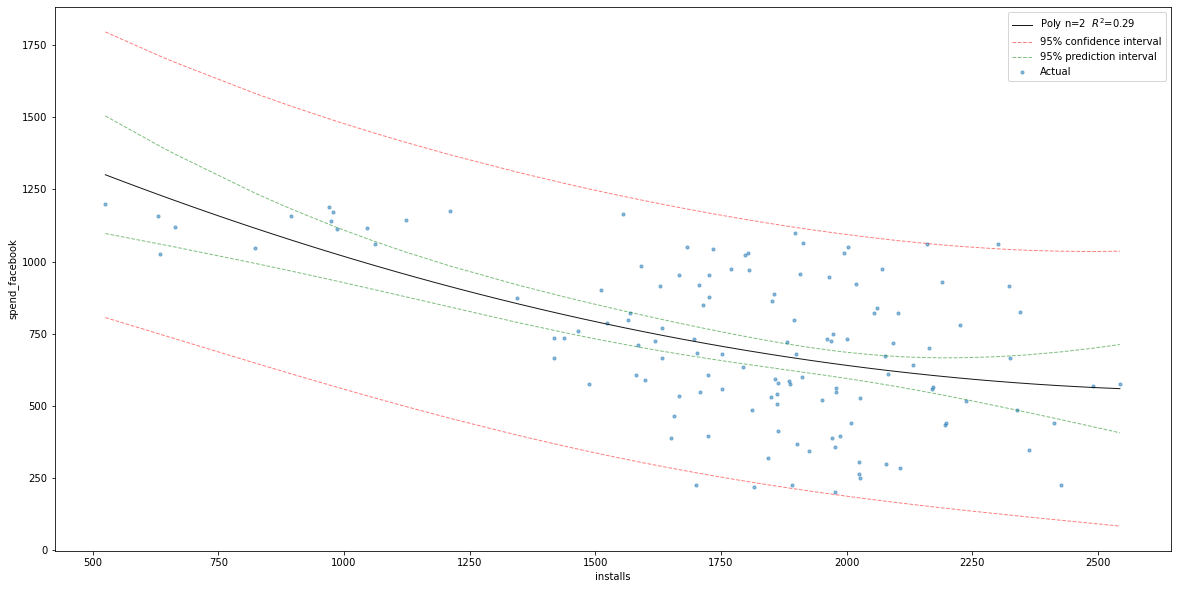

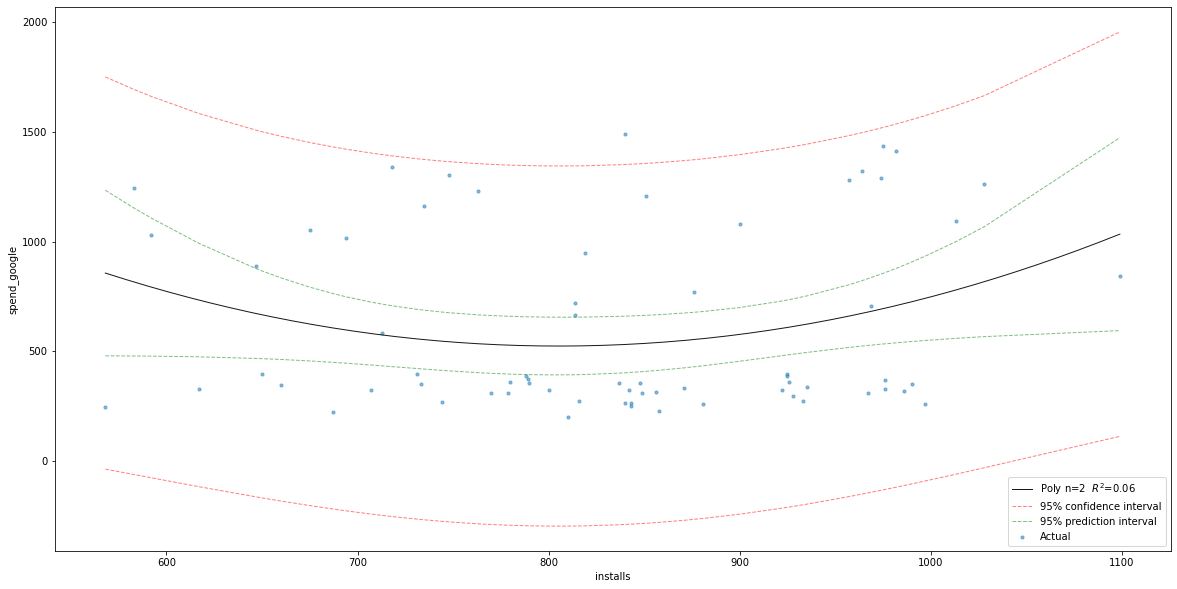

In [15]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.formula.api as smf    
from statsmodels.stats.outliers_influence import summary_table

def plot_poly(df,x_name,y_name):
    x = df[x_name] 
    y = df[y_name]

    plt.figure(figsize=(20,10))
    plt.scatter(x,y, s=10, alpha=0.5, label = 'Actual')
    plt.xlabel(x_name)
    plt.ylabel(y_name)

    # points linearly spaced for predictor variable
    x1 = pd.DataFrame({x_name: np.linspace(df[x_name].min(), df[x_name].max())})

    # 2nd order polynomial
    poly_2 = smf.ols(formula= y_name + ' ~ 1 + '+x_name+' + I('+x_name+' ** 2.0)',   data=df).fit()
    y1 = poly_2.predict(x1)
    
    # this correctly plots my single 2nd-order poly best-fit line:
    plt.plot(x1[x_name], y1 , 'black',lw=1, label='Poly n=2  $R^2$=%.2f' % poly_2.rsquared,alpha=0.9)


#     prstd, iv_l, iv_u = wls_prediction_std(poly_2)

    st, data, ss2 = summary_table(poly_2, alpha=0.05)

    fittedvalues = data[:,2]
    predict_mean_se  = data[:,3]
    predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
    predict_ci_low, predict_ci_upp = data[:,6:8].T

    # check we got the right things
#     print(np.max(np.abs(poly_2.fittedvalues - fittedvalues)))
#     print(np.max(np.abs(iv_l - predict_ci_low)))
#     print(np.max(np.abs(iv_u - predict_ci_upp)))

    data_intervals = {x_name: x, y_name : y,'predict_low': predict_ci_low, 'predict_upp': predict_ci_upp, 'conf_low': predict_mean_ci_low, 'conf_high': predict_mean_ci_upp}

    df_intervals = pd.DataFrame(data=data_intervals)

    df_intervals_sort = df_intervals.sort_values(by=x_name)


    # plt.plot(x, y, 'o')
    # plt.plot(x, fittedvalues, '-', lw=2)
    plt.plot(df_intervals_sort[x_name], df_intervals_sort.predict_low, 'r--', lw=1, alpha=0.5)
    plt.plot(df_intervals_sort[x_name], df_intervals_sort.predict_upp, 'r--', lw=1, alpha=0.5,label='95% confidence interval')
    plt.plot(df_intervals_sort[x_name], df_intervals_sort.conf_low, 'g--', lw=1, alpha=0.5)
    plt.plot(df_intervals_sort[x_name], df_intervals_sort.conf_high, 'g--', lw=1, alpha=0.5, label='95% prediction interval')

    plt.legend()
    
    poly_mapper = pd.concat([pd.Series(x1[x_name]),pd.Series(y1)],1)
    poly_mapper.columns = [x_name,y_name]
    poly_mapper.sort_values(by=y_name,inplace = True)
    
    return poly_mapper

# df = data.copy()
df = data[~(data['spend_facebook'].isna()) & (data['spend_google'].isna()) & (data['promotion'] == 'No')]
fb_mapper = plot_poly(df,'installs','spend_facebook')

# df = data.copy()
df = data[(data['spend_facebook'].isna()) & (~data['spend_google'].isna()) & (data['promotion'] == 'No')]
gl_mapper = plot_poly(df,'installs','spend_google')

In [16]:

fb_df = pd.merge_asof(data.loc[(~data['spend_facebook'].isna()) & (data['flag'] != 'Only FB')].sort_values(by='spend_facebook'),
              fb_mapper.rename(columns = {'installs':'installs_fb'}),
              on = 'spend_facebook',direction = 'nearest')

gl_df = pd.merge_asof(data.loc[(~data['spend_google'].isna()) & (data['flag'] != 'Only Google')].sort_values(by='spend_google'),
              gl_mapper.rename(columns = {'installs':'installs_gl'}),
              on = 'spend_google',direction = 'nearest')


In [17]:
data = data.merge(fb_df[['date','installs_fb']],on='date',how='left')

data = data.merge(gl_df[['date','installs_gl']],on='date',how='left')


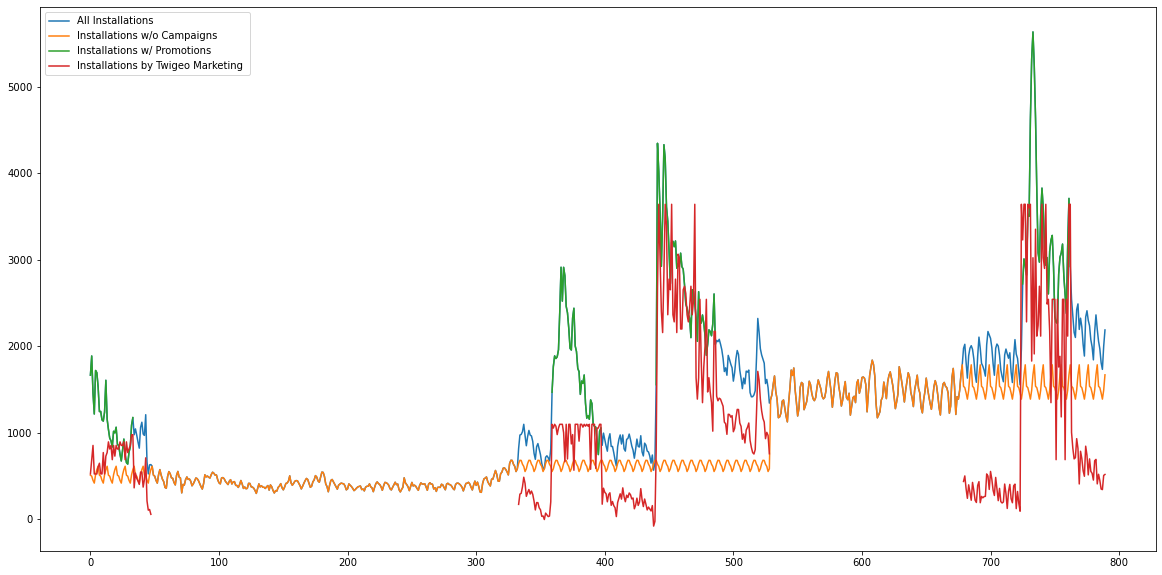

In [25]:

df = data.copy()

df['installs_wo_campaigns'] = df['installs']
df.loc[(df['flag'] != 'No Campaign'),'installs_wo_campaigns'] = np.nan

df['installs_w_promotions'] = df['installs']
df.loc[(df['promotion'] != 'Yes'),'installs_w_promotions'] = np.nan

# Forward fill time periods 
for i in df.iterrows():
    if str(i[1]['installs_wo_campaigns']) == 'nan':
        df.loc[i[0],['installs_wo_campaigns']] = df.loc[(df['date'] < i[1]['date']) & (df['weekday'] == i[1]['weekday']),'installs_wo_campaigns'].tail(2).max() 
    
for i in reversed(list(df.index)):
    if str(df.loc[i,['installs_wo_campaigns']][0]) == 'nan':
        df.loc[i,['installs_wo_campaigns']] = df.loc[(df['date'] > df.loc[i,'date']) & (df['weekday'] == df.loc[i,'weekday']),'installs_wo_campaigns'].head(2).max() 

df['only_fb_or_gl'] = df['installs'] - df['installs_wo_campaigns']
df.loc[(df['flag'] != 'Only FB') & (df['flag'] != 'Only Google'),'only_fb_or_gl'] = np.nan 

df['installs_by_twigeo'] = df['installs_gl'].fillna(0)+df['installs_fb'].fillna(0)+df['only_fb_or_gl'].fillna(0)#+df['installs_wo_campaigns']

df.loc[(df['flag'] == 'No Campaign'),'installs_by_twigeo'] = np.nan 


df['Facebook'] = np.where(df['spend_facebook'].isna(),False,True)
df['Google'] = np.where(df['spend_google'].isna(),False,True)
df['Discounted'] = np.where(df['promotion'] == 'Yes',True,False)

# display(df.groupby(['Facebook','Google','Discounted'],as_index=True)[[i for i in list(df.columns)  if 'install' in i]].sum())

plt.figure(figsize=(20,10))
plt.plot(df.index,df['installs'],label = 'All Installations',alpha = 1)
plt.plot(df.index,df['installs_wo_campaigns'], label = 'Installations w/o Campaigns',alpha = 1)
plt.plot(df.index,df['installs_w_promotions'], label = 'Installations w/ Promotions',alpha = 1)
plt.plot(df.index,df['installs_by_twigeo'], label = 'Installations by Twigeo Marketing ',alpha = 1)

plt.legend()




In [30]:

answer = round(df['installs_by_twigeo'].sum(),0).astype(int)

print(str(answer)+' users installed the app due to marketing executed by Twigeo historically')

374929 users installed the app due to marketing executed by Twigeo historically
